In [2]:
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
rc('font', family='serif')

C:\Users\dcald\AppData\Local\Temp\ipykernel_24012\2821662593.py:6: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  data = pd.read_csv('forward-process-error-optimal.txt', delim_whitespace=True, header=None, encoding="utf-16")


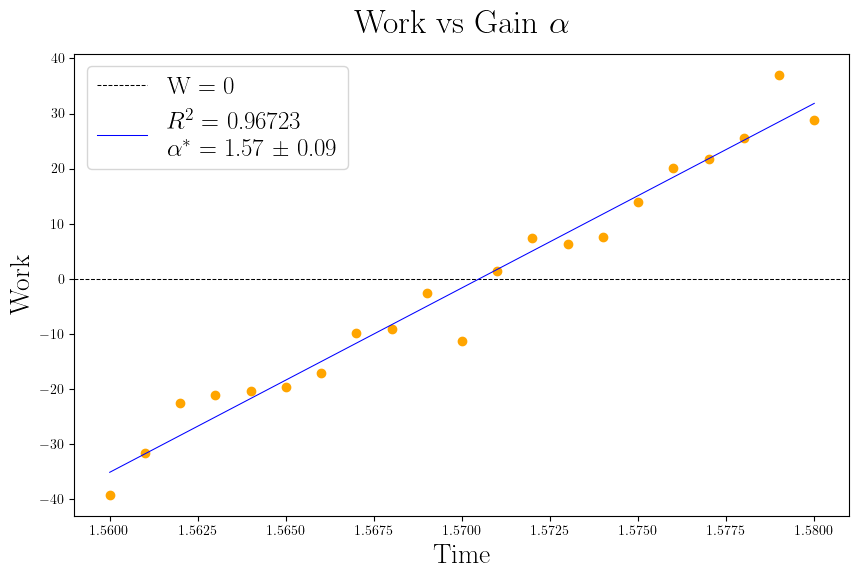

In [4]:
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Load the dataset
data = pd.read_csv('forward-process-error-optimal.txt', delim_whitespace=True, header=None, encoding="utf-16")

# Assign column names for clarity
data.columns = ['Gain', 'Work']

X = data['Gain'].values  # Independent variable (Time), reshaped for sklearn
Y = data['Work'].values 

# Compute uncertainty in the slope using SciPy
slope, intercept, r_value, p_value, slope_std_err = linregress(data['Gain'], data['Work'])

# Generate predicted values for the trendline
Y_pred = slope*X+intercept


# Estimate intercept uncertainty using standard error propagation
n = len(data['Gain'])
X_mean = np.mean(data['Gain'])
S_xx = np.sum((data['Gain'] - X_mean) ** 2)
intercept_std_err = slope_std_err * np.sqrt(np.sum(data['Gain']**2) / n)

# Compute zero-crossing point
X_zero = -intercept / slope

# Compute uncertainty in zero-crossing using error propagation
X_zero_uncertainty = np.abs(1 / slope) * np.sqrt(intercept_std_err**2 + (X_zero * slope_std_err)**2)



# Generate the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data['Gain'], data['Work'], color='orange')
plt.axhline(0, color='black', linestyle='--', linewidth=0.75, label='W = 0')

#plot the model
plt.plot(data['Gain'], Y_pred, 
         label=
               f'$R^2$ = {r_value**2:.5f}\n'
               rf'$\alpha^* =$ {X_zero:.2f} ± {X_zero_uncertainty:.2f}',
         color='blue', linewidth=0.75)

# Adding labels, title, and legend
plt.title(r'Work vs Gain $\alpha$', fontsize=24, pad=15)
plt.xlabel('Time',fontsize=20)
plt.ylabel('Work',fontsize=20)
plt.legend(fontsize=18)

# Display the plot
#plt.show()
plt.savefig('forward-process-error-optimal.pdf',format='pdf')